In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Collected data from kaggle

In [4]:
spam_data = pd.read_csv('spam.csv')
spam_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Pre Processing 

In [6]:
spam_data.shape

(5572, 2)

In [7]:
# Show Column Info 
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
spam_data['Category'].value_counts() # Counting Spam and ham values in dataframe 

Category
ham     4825
spam     747
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Spam and not spam Messages by Category')

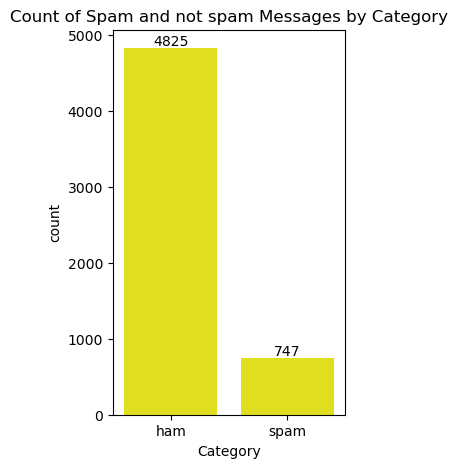

In [34]:
plt.figure(figsize=(3,5))
data_label = sns.countplot(x = spam_data['Category'],color='yellow')
data_label.bar_label(data_label.containers[0])
plt.title('Count of Spam and not spam Messages by Category')

In [10]:
spam_data['Message'] 

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

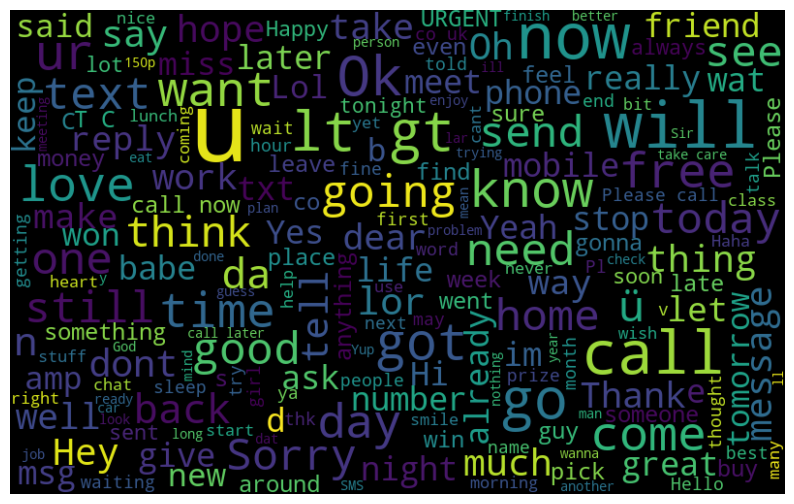

In [60]:
# Visualizing the frequent word 
all_words = " ".join([sentence for sentence in spam_data['Message']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width =800 , height=500, random_state = 43, max_font_size =100).generate(all_words)

#Ploting the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
spam_data['Spam']=spam_data['Category'].apply(lambda x:1 if x=='spam' else 0)
spam_data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
spam_data.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Splitting Data into X and Y Variable's

In [ ]:
vectorizer = CountVectorizer() # Count vectorizer converts mails categorical data into numerical metrix for model training 

In [14]:
X = vectorizer.fit_transform(spam_data['Message'])
Y = spam_data['Spam']

In [15]:
X

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [16]:
Y 

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Spam, Length: 5572, dtype: int64

## Splitting Data into Training and Testing 

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, Y , test_size=0.3, random_state=2)

In [59]:
# creating a dictionary for storing the models 
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),  # Suitable for binary features (e.g., presence/absence of words)
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
}


for model_name , model in models.items():
    # fiting the data in the model 
    model.fit(X_train,y_train)

    # test model 
    predictions = model.predict(X_test)

    #Accuracy  
    accuracy = accuracy_score(y_test, predictions)

    # calcualting confusion matrix 
    cm = confusion_matrix(y_test,predictions)

    print(f"{model_name}  Accuarcy : {accuracy}")
    print(f"{model_name}  Confusion matrix ")
    print(np.array2string(cm ,separator=", "),"\n")
    

RandomForest  Accuarcy : 0.9742822966507177
RandomForest  Confusion matrix 
[[1445,    0],
 [  43,  184]] 

GradientBoosting  Accuarcy : 0.9629186602870813
GradientBoosting  Confusion matrix 
[[1438,    7],
 [  55,  172]] 

KNeighbors  Accuarcy : 0.9090909090909091
KNeighbors  Confusion matrix 
[[1445,    0],
 [ 152,   75]] 

MultinomialNB  Accuarcy : 0.9730861244019139
MultinomialNB  Confusion matrix 
[[1426,   19],
 [  26,  201]] 

BernoulliNB  Accuarcy : 0.9712918660287081
BernoulliNB  Confusion matrix 
[[1438,    7],
 [  41,  186]] 

LogisticRegression  Accuarcy : 0.9760765550239234
LogisticRegression  Confusion matrix 
[[1443,    2],
 [  38,  189]] 



we are getting most of same accuracy on algorithem's so we are going to use MultinomialNB algorithem

In [19]:
# Step 4: Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [51]:
predictions = model.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
cm = confusion_matrix(y_test,predictions)
cm

array([[1426,   19],
       [  26,  201]], dtype=int64)

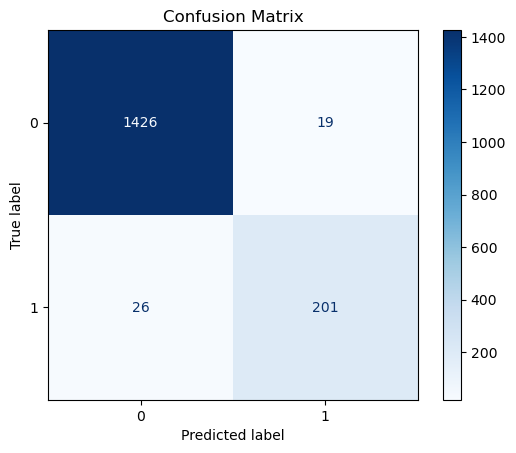

In [54]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.score(X_test,y_test) 

0.9730861244019139

We Got 97% Accuracy Score in our model 

In [55]:
# Creating a Function for user input 
def predict_email(email):
    Email_Vector = vectorizer.transform([email])
    prediction = model.predict(Email_Vector)

    return 'Spam' if prediction[0] == 1 else 'Not Spam'

user_input = input('Wrte an email or message: ')
print(f'This email/message is: {predict_email(user_input)}')  # Output: Spam or Not Spam

This email/message is: Spam


In [61]:
# some random messages // emails  for checking the algorithem 
messages =[
    'Sounds great! Are you home now?',
    'I\'m so glad you\'re home. I was worried sick about you.',
    "Hey, are you still up for the hike this weekend? Let me know so we can plan.",
    "Please find attached the project report for review. Let me know if you have any feedback.",
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

emails =[
    """Subject:Monthly Statement for Your Account
    Body:
    Dear Customer,
    Your monthly account statement is ready to view. Please log in to your account to review the details. Contact us if you have any questions or concerns.""",

    """Subject: Book Club Meeting This Weekend
    Body:
    Hello Book Club Members,
    Just a reminder about our meeting this Saturday at 5 p.m. We’ll be discussing our latest book, “The Great Gatsby.” Bring your thoughts and insights!""",

    """Subject: Happy Holidays from [Your Company Name]!
    Body:
    Dear [Customer Name],
    As the holiday season approaches, we wanted to extend our warmest wishes to you and your family. Thank you for being part of our journey this year!""",

    """Subject: Invoice #12345 from XYZ Company
    Body:
    Dear [Customer Name],
    Attached is the invoice for your recent purchase with XYZ Company. Please review and complete the payment by the due date. Feel free to reach out if you need any assistance."""

]